In [ ]:
import os
import pickle 
import sys
import pandas as pd
import json
from collections import Counter
from Bio import SeqIO, pairwise2 
import diverse_yeast_tools as dyt
import matplotlib.pyplot as plt
  

y1000plus_dir = dyt.y1000plus_dir
#base_dir = os.path.normpath('G:/My Drive/Crick_LMS/projects/diverse_yeasts')

base_dir = dyt.base_dir

proteomics_dir = os.path.normpath('G:/My Drive/Crick_LMS/projects/diverse_yeasts/proteomics')

##Need to add something for S. cer
shen_proteome_dir = os.path.normpath(y1000plus_dir + os.sep + 'shen_2018_data/0_332yeast_genomes/332_genome_annotations/pep') + os.sep 
uniprot_proteome_dir = os.path.normpath('G:/My Drive/Crick_LMS/external_data/genomes/diverse_yeast/proteomes') + os.sep 


# #Load y1000 species table
# y1000_species = pd.read_csv(y1000plus_dir + os.sep + os.path.normpath("y1000plus_tools_data/y1000plus/y1000_species_table.csv"), index_col=0)

species_selection = pd.read_csv(base_dir + os.sep + os.path.normpath('selected_proteins/species_selection/species_selection.csv' ))


#spec_orig_genome_lookup = dict(zip(y1000_species['spec_og_id'], y1000_species['original_genome_id']))


# #Load S.Cer lookup table: 
# scer_lookup_fname = y1000plus_dir + os.sep + os.path.normpath('y1000plus_tools_data/y1000plus/id_lookups/saccharomyces_cerevisiae.csv')

# scer_lookup = pd.read_csv(scer_lookup_fname, index_col=0)
# scer_y1000_id_gene_id_lookup = dict(zip(scer_lookup['y1000_id'], scer_lookup.index))



#The script for the proteomes for which we had proteomic data may use functions from y1000plus and yeast_esr_exp library

# # if yeast_esr_flag =='Y':
# yeast_esr_exp_path = os.path.normpath('C:/Users/heineib/Documents/GitHub/yeast_esr_expression_analysis') + os.sep
# #io_library_path_core = io_library_path + 'core' + os.sep
# if not(yeast_esr_exp_path in sys.path):
#     sys.path.append(yeast_esr_exp_path)
#     print("Added " + yeast_esr_exp_path + " to path" )

# import yeast_esr_exp
# yeast_esr_exp.base_dir = yeast_esr_exp_path
# yeast_esr_exp.data_processing_dir = yeast_esr_exp_path + os.path.normpath('expression_data') + os.sep


# y1000plus_tools_flag = input("Use y1000plus_tools functions? (Y/n)")

# # if y1000plus_tools_flag =='Y':
# y1000plus_tools_path = os.path.normpath('C:/Users/heineib/Documents/GitHub/y1000plus_tools') + os.sep
# #io_library_path_core = io_library_path + 'core' + os.sep
# if not(y1000plus_tools_path in sys.path):
#     sys.path.append(y1000plus_tools_path)
#     print("Added " + y1000plus_tools_path + " to path" )

# import y1000plus_tools
# y1000plus_tools.base_dir = os.path.normpath('C:/Users/heineib/Documents/GitHub/y1000plus_tools') + os.sep
# print("y1000plus_tools dir is " + y1000plus_tools.base_dir )                      
# y1000plus_tools.y1000plus_dir = y1000plus_tools.base_dir + 'data' + os.sep 
# print("y1000plus data dir is " + y1000plus_tools.y1000plus_dir)







## Calculate pairwise scores and find matches between shen and uniprot proteomes for proteins for which we have proteomic data. 

In [ ]:
# #Find matches comparing shen and uniprot proteome. 

# #Only need to redo this if you are re-calculating pairwise_scores

# shen_proteome_dir = os.path.normpath(y1000plus_dir + os.sep + 'shen_2018_data/0_332yeast_genomes/332_genome_annotations/pep') + os.sep 
# uniprot_proteome_dir = os.path.normpath('C:/Users/heineib/Google Drive/Crick_LMS/external_data/genomes/diverse_yeast/proteomes') + os.sep 

# #(orig_genome ame: (shen_fname, uniprot_fname)): 
# proteome_fasta_dict = {'kluyveromyces_lactis': {'shen': shen_proteome_dir + 'kluyveromyces_lactis.max.pep', 
#                                                 'uniprot': uniprot_proteome_dir + 'Klac_uniprot-proteome_UP000000598.fasta'
#                                                }, 
#                        'wickerhamomyces_anomalus': {'shen': shen_proteome_dir + 'wickerhamomyces_anomalus.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Wano_uniprot-proteome_UP000094112.fasta'
#                            }, 
#                        'lachancea_thermotolerans': {'shen': shen_proteome_dir + 'lachancea_thermotolerans.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Lthe_uniprot-proteome_UP000002036.fasta'
#                            }, 
#                        'komagataella_pastoris': {'shen': shen_proteome_dir + 'komagataella_pastoris.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Kpas_uniprot-proteome_UP000000314.fasta'
#                            }, 
#                         'candida_tropicalis': {'shen': shen_proteome_dir + 'candida_tropicalis.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Ctro_uniprot-proteome_UP000002037.fasta'
#                            },
#                         'debaryomyces_hansenii': {'shen': shen_proteome_dir + 'debaryomyces_hansenii.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Dhan_uniprot-proteome_UP000000599.fasta'
#                            }, 
#                         'yHMPu5000034957_hanseniaspora_osmophila_160519': {'shen': shen_proteome_dir + 'yHMPu5000034957_hanseniaspora_osmophila_160519.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Hosm_uniprot-proteome_UP000095728.fasta'
#                            }, 
#                         'kluyveromyces_marxianus': {'shen': shen_proteome_dir + 'kluyveromyces_marxianus.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Kmar_uniprot-proteome_UP000065495.fasta'
#                            }, 
#                         'zygosaccharomyces_rouxii': {'shen': shen_proteome_dir + 'zygosaccharomyces_rouxii.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Zrou_uniprot-proteome_UP000008536.fasta'
#                            }
#                       }

# study1 = 'shen'
# study2 = 'uniprot'

# match_points = 1
# mismatch_points = -1
# gap_open = -.5
# gap_extension = -0.1
# NN_top_scores = 5
# penalize_end_gaps = True 


# pairwise_scores = {}
# spec_orig_genomes = list[proteome_fasta_dict.keys()]#[ 'yHMPu5000034957_hanseniaspora_osmophila_160519']  #'zygosaccharomyces_rouxii','kluyveromyces_marxianus','candida_tropicalis', 'debaryomyces_hansenii',

# for spec_orig_genome in spec_orig_genomes:
#     print(spec_orig_genome)
#     #spec_orig_genome = 'komagataella_pastoris'# 'lachancea_thermotolerans' #'wickerhamomyces_anomalus' # 'kluyveromyces_lactis'

#     use_subset = True
#     subset = set(gene_full_sets[spec_orig_genome])
#     pairwise_score_loaded = False #if you have already saved some and want to do the rest

#     # #Check timing with time module
#     # #python parallel programming library
#     # #ipy_parallel dask
#     # #https://ipyparallel.readthedocs.io/en/stable/development/messages.html#parallel-messages

#     # #All by all pairwise sequence alignment, output top NN results

#     genenames_study1 = []
#     AA_seqs_study1 = SeqIO.parse(proteome_fasta_dict[spec_orig_genome][study1], "fasta")
#     for seq_study1 in AA_seqs_study1: 
#         genename_study1 = dyt.gene_id_retrieve(study1, seq_study1)
#     #     if spec=='Smik': 
#     #         genename_study1_dash = genename_study1
#     #         genename_study1 = 'smik' + genename_study1_dash.split('smik_')[1]
#         genenames_study1.append(genename_study1)

#     if use_subset: 
#         print('Using Subset genes')
#     else: 
#         subset = set(genenames_study1)

#     if pairwise_score_loaded: 
#         genes_to_search = ((subset & set(genenames_study1)) - set(pairwise_score.keys()))
#     else: 
#         pairwise_score = {}
#         genes_to_search = (subset & set(genenames_study1))


#     AA_seqs_study1 = SeqIO.parse(proteome_fasta_dict[spec_orig_genome][study1], "fasta")


#     N = len(genes_to_search)
#     for seq_study1 in AA_seqs_study1: 
#         check_gene = False
#         genename_study1 = dyt.gene_id_retrieve(study1, seq_study1)
#     #     if spec=='Smik': 
#     #         genename_study1_dash = genename_study1
#     #         genename_study1 = 'smik' + genename_study1_dash.split('smik_')[1]
#         if genename_study1 in genes_to_search:
#             check_gene = True

#         if check_gene: 
#             print(str(N) + ' ' + genename_study1)
#             AA_seqs_study2 = SeqIO.parse(proteome_fasta_dict[spec_orig_genome][study2], "fasta")
#             pairwise_score_comps = {}
#             for seq_study2 in AA_seqs_study2: 
#                 genename_study2 = seq_study2.id
#                 score = pairwise2.align.globalms(seq_study2,seq_study1, match_points, mismatch_points, gap_open, gap_extension, penalize_end_gaps = penalize_end_gaps, score_only = True )
#                 pairwise_score_comps[genename_study2] = score
#             pairwise_score_comps_df = pd.Series(pairwise_score_comps)
#             pairwise_score[genename_study1] = pairwise_score_comps_df.sort_values(ascending=False).iloc[0:NN_top_scores]
#             #print(pairwise_score[genename_YGOB])
#             N = N - 1

#     pairwise_scores[spec_orig_genome] =  pairwise_score

In [ ]:
##Load pairwise score (extra species)

spec_orig_genome = 'ogataea_parapolymorpha'
pairwise_score_fname = base_dir + os.sep + os.path.normpath('selected_proteins/shen_uniprot_mapping/pairwise_score__'+spec_orig_genome+ '.pkl')
#pairwise_scores_fname = base_dir + os.sep + 'pairwise_scores.pkl'

# # Save pairwise_scores
# with open(pairwise_scores_fname, 'wb') as f:
#     pickle.dump(pairwise_scores, f)

# Load pairwise_scores
with open(pairwise_score_fname, 'rb') as f: 
    pairwise_score = pickle.load(f)

C:\Users\bheineike\AppData\Local\Temp\ipykernel_7132\4129488128.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  maxval = options_sorted[-1]
C:\Users\bheineike\AppData\Local\Temp\ipykernel_7132\4129488128.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff_top2_val = maxval-options_sorted[-2]


Text(0, 0.5, 'difference between top 2')

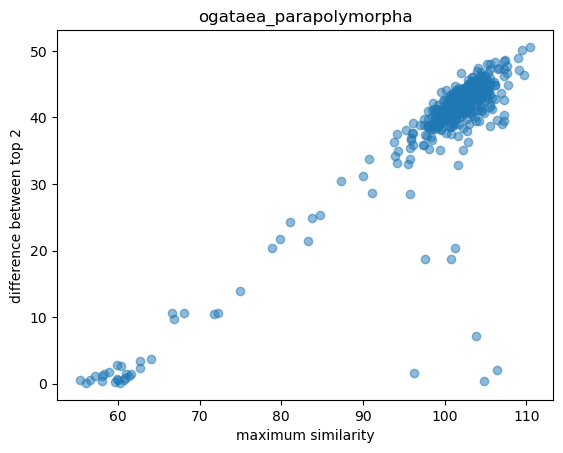

In [ ]:
## Show histogram of the pairwise scores and use it to choose thresholds: 

#fig, axarr = plt.subplots(3,3, figsize=(15,15))
fig, ax = plt.subplots(1,1)

#pairwise_scores = {}
#for jj, spec in enumerate(['Ncas','Klac','Smik']):

#pairwise_score_fname = data_processing_dir + os.path.normpath("ortholog_files_YGOB/AA_lists/" + spec + "_pairwise_score.pkl")

#with open(pairwise_score_fname,'rb') as file: 
#    pairwise_score= pickle.load(file)

#pairwise_scores[spec] = pairwise_score
#Use histogram to choose thresholds

spec_orig_genome = 'ogataea_parapolymorpha'

#for jj, (spec_orig_genome, pairwise_score) in enumerate(pairwise_scores.items()):
#    ax = axarr.flatten()[jj]
maxvals = []
diff_top2 = []
for genename_shen, options in pairwise_score.items(): 
    options_sorted = options.sort_values()
    #idxmax = options.idxmax()
    maxval = options_sorted[-1]
    diff_top2_val = maxval-options_sorted[-2]
    diff_top2.append(diff_top2_val)
    maxvals.append(maxval)
    #if maxval<90: 
    #if (maxval>90) & (diff_top2_val<20):
    #   print('{}, maxval: {}, difference: {}'.format(genename_shen,maxval,diff_top2_val))


ax.scatter(maxvals, diff_top2, alpha = 0.5)
ax.set_title(spec_orig_genome)
ax.set_xlabel('maximum similarity')
ax.set_ylabel('difference between top 2')
#ax.set_title(spec)

In [ ]:
sim_score_high_thresh = 75
sim_score_low_thresh = 60
sim_score_diff_thresh = 8

spec_orig_genome = 'ogataea_parapolymorpha'

#Read in shen protein IDs using fasta file header
selected_proteins_fname_species = base_dir + os.sep +  os.path.normpath('selected_proteins/selected_proteins_by_species/' + spec_orig_genome + '__shen__selected_proteins.fasta')

#Load map from full name to shen identifier 
spec_lookup_fname = y1000plus_dir + os.sep +  os.path.normpath('y1000plus_tools_data/y1000plus/id_lookups/' + spec_orig_genome + '.csv')
spec_lookup = pd.read_csv(spec_lookup_fname, index_col=0)

selected_proteins_shen = SeqIO.parse(selected_proteins_fname_species, "fasta")

pairwise_score_fname = base_dir + os.sep + os.path.normpath('selected_proteins/shen_uniprot_mapping/pairwise_score__'+spec_orig_genome+ '.pkl')
# Load pairwise_score
with open(pairwise_score_fname, 'rb') as f: 
    pairwise_score = pickle.load(f)


#Output is a csv with y1000 gene_id, gene_full, y1000_id, and uniprot_id if present. 
fname_out = base_dir + os.sep + os.path.normpath('/selected_proteins/shen_uniprot_mapping/y1000_id_2_uniprot_id_' + spec_orig_genome + '.csv')

with open(fname_out, 'w') as f_out: 
    for record_shen in selected_proteins_shen: 
        #check_gene = False
        gene_full = record_shen.description.split()[3].split('=')[1] 

        spec_lookup_row = spec_lookup[spec_lookup['gene_full']==gene_full]
        assert len(spec_lookup_row) == 1, 'No single match for ' + gene_full
        gene_id = spec_lookup_row.index[0]
        y1000_id = spec_lookup_row['y1000_id'][gene_id]

        scores = pairwise_score[gene_full]
        scores_sorted = scores.sort_values(ascending=False)
        maxval = scores_sorted[0]
        diff_top2_val = maxval - scores_sorted[1]

        if ((maxval>sim_score_high_thresh) | ((maxval>sim_score_low_thresh) & (diff_top2_val>sim_score_diff_thresh))): 
            uniprot_id = scores_sorted.index[0].split('|')[1]  #The id looks like tr|<ID>|<name_specabbrev>, so we only extract the middle id

        else: 
            #f_log.write('No clear uniprot match: ' + shen_full)
            uniprot_id = None

        f_out.write('{},{},{},{}\n'.format(gene_id,gene_full,y1000_id, uniprot_id))
        
        #shen_full_2_uniprot[shen_full] = uniprot_id

# with open(fname_log,'w') as f_log: 
#     for spec_abbrev, spec in spec_abbrev_map.items():
#         #Skipping S. cer because I don't have pairwise scores for that
#         if not(spec_abbrev in {'SC', 'BY', 'CA'}): 
#                #spec_abbrev = 'KL' 
#             #spec = spec_abbrev_map[spec_abbrev]
#             fname_out = proteomics_dir + os.sep + os.path.normpath('220811/uniprot_2_y1000id_' + spec_abbrev + '.csv')


#             #Load map from full name to shen identifier 

#             spec_lookup_fname = y1000plus_dir  + os.sep +  os.path.normpath('y1000plus_tools_data/y1000plus/id_lookups/' + spec + '.csv')
#             spec_lookup = pd.read_csv(spec_lookup_fname, index_col=0)

#             shen_full_2_y1000_id = dict(zip(spec_lookup['gene_full'], spec_lookup['y1000_id']))

#             #Make Dictionary from pairwise scores
#             pairwise_scores_spec = pairwise_scores[spec]

#             sim_score_high_thresh = 75
#             sim_score_low_thresh = 60
#             sim_score_diff_thresh = 8

#             shen_full_2_uniprot = {}

#             f_log.write('Species: ' + spec + '\n')

#             for shen_full, scores in pairwise_scores_spec.items(): 

#                 #shen_full = 'augustus_masked-CR382121-processed-gene-0.43'
#                 #scores = pairwise_scores_spec[shen_full]

#                 scores_sorted = scores.sort_values(ascending=False)
#                 maxval = scores_sorted[0]
#                 diff_top2_val = maxval - scores_sorted[1]

#                 if ((maxval>sim_score_high_thresh) | ((maxval>sim_score_low_thresh) & (diff_top2_val>sim_score_diff_thresh))): 
#                     uniprot_id = scores_sorted.index[0].split('|')[1]  #The id looks like tr|<ID>|<name_specabbrev>, so we only extract the middle id

#                 else: 
#                     f_log.write('No clear uniprot match: ' + shen_full)
#                     uniprot_id = None

#                 shen_full_2_uniprot[shen_full] = uniprot_id



#             f_log.write('Shen IDs in selected OGs: ' + str(len(pairwise_scores_spec)) + '\n')
#             shen_mapped = [value for value in shen_full_2_uniprot.values() if value != None]
#             f_log.write('Shen IDs mapped to uniprot: ' + str(len(shen_mapped)))
#             if len(shen_mapped)==len(set(shen_mapped)):
#                 f_log.write('One shen ID mapped to multiple Uniprot IDs\n')
#                 f_log.write('Duplicate Uniprot IDs: \n')
#                 for name, count in Counter(shen_mapped).items(): 
#                     if count>1: 
#                         f_log.write(name + '\n')

#             #check how many shen_ids are missing
#             f_log.write('total Shen IDs: ' + str(len(spec_lookup))+ '\n')
#             assert len(set(shen_full_2_uniprot.keys()) - set(spec_lookup['gene_full']))==0, 'Some unidentifed shen ids'
#             f_log.write('Shen IDs not mapped from og score matrix: ' + str(len(set(spec_lookup['gene_full']) - set(shen_full_2_uniprot.keys())))+ '\n')

#             #Check how many uniprot ids are missing
#             uniprot_ids = []
#             uniprot_fasta = SeqIO.parse(proteome_fasta_dict[spec]['uniprot'], "fasta")
#             for seq in uniprot_fasta: 
#                 name = seq.name
#                 uniprot_ids.append(name.split('|')[1])

#             f_log.write('Total Uniprot IDs: ' +  str(len(uniprot_ids))+ '\n')
#             assert len(set(shen_full_2_uniprot.values()) - (set(uniprot_ids) | {None}))==0, 'Some unidentifed Uniprot IDs'
#             f_log.write('Uniprot IDs not mapped from og score matrix: ' + str(len(set(uniprot_ids) - set(shen_full_2_uniprot.values())))+ '\n')

#             #Check how many uniprot ids are missing from Federica's data (assert none)
#             data_uniprot_ids = combined_data.loc[combined_data['Species']==spec_abbrev, :]['Protein.Ids'] 
#             f_log.write('Uniprot IDs in data: ' + str(len(set(data_uniprot_ids)))+ '\n')

#             #Check how many from federica's data set map to shen ids
#             f_log.write('Uniprot IDs in data that map to OG proteins: ' + str(len(set(data_uniprot_ids) & set(shen_full_2_uniprot.values())  ))+ '\n')





#             #Make dictionary of Uniprot id to shen identifer 

#             uniprot_id_2_y1000_id_spec = {}

#             with open(fname_out, 'w') as f_out: 
#                 for key, value in shen_full_2_uniprot.items(): 
#                     if value != None: 
#                         uniprot_id_2_y1000_id_spec[value] = shen_full_2_y1000_id[key]
#                         f_out.write(value + ', ' + shen_full_2_y1000_id[key] +'\n')

C:\Users\bheineike\AppData\Local\Temp\ipykernel_7132\3279581986.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  maxval = scores_sorted[0]
C:\Users\bheineike\AppData\Local\Temp\ipykernel_7132\3279581986.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff_top2_val = maxval - scores_sorted[1]


In [ ]:
# #Build Fasta file

# fasta_out_fname = base_dir + os.sep + 'selected_proteins' + os.sep + 'selected_proteins.fasta'

# #the following information is in the fasta header for each protein
# #<spec_orig_genome>__<og>__<y1000_id>: you can use this to look up other metadata in the og_metadata.json file
# #source:  The source of the peptide sequence (either 'shen' or 'uniprot')
# #gene_full:  The full name of the gene from source peptide file
# #gene_full_shen: the full name of the gene from the shen peptide file
# #L: Length of the gene
# #sim_score_vs_shen: The similarity score between the shen peptide sequence and the uniprot peptide sequence.  If it is above the threshold, the uniprot sequence is used, below the threshold, we continue to use the shen sequence
# #sim_score_vs_shen_diff: The difference between similarity score of the top peptide and the second highest scoring peptide.  For genes with similarity score below a threshold, if this difference is too small, we keep the shen sequence

# shen_proteome_dir = os.path.normpath(y1000plus_dir + os.sep + 'shen_2018_data/0_332yeast_genomes/332_genome_annotations/pep') + os.sep 
# uniprot_proteome_dir = os.path.normpath('C:/Users/heineib/Google Drive/Crick_LMS/external_data/genomes/diverse_yeast/proteomes') + os.sep 

# #(species genome name: (shen_fname, uniprot_fname)): 
# proteome_fasta_dict = {'kluyveromyces_lactis': {'shen': shen_proteome_dir + 'kluyveromyces_lactis.max.pep', 
#                                                 'uniprot': uniprot_proteome_dir + 'Klac_uniprot-proteome_UP000000598.fasta'
#                                                }, 
#                        'wickerhamomyces_anomalus': {'shen': shen_proteome_dir + 'wickerhamomyces_anomalus.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Wano_uniprot-proteome_UP000094112.fasta'
#                            }, 
#                        'lachancea_thermotolerans': {'shen': shen_proteome_dir + 'lachancea_thermotolerans.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Lthe_uniprot-proteome_UP000002036.fasta'
#                            }, 
#                        'komagataella_pastoris': {'shen': shen_proteome_dir + 'komagataella_pastoris.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Kpas_uniprot-proteome_UP000000314.fasta'
#                            }, 
#                         'candida_tropicalis': {'shen': shen_proteome_dir + 'candida_tropicalis.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Ctro_uniprot-proteome_UP000002037.fasta'
#                            },
#                         'debaryomyces_hansenii': {'shen': shen_proteome_dir + 'debaryomyces_hansenii.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Dhan_uniprot-proteome_UP000000599.fasta'
#                            }, 
#                         'yHMPu5000034957_hanseniaspora_osmophila_160519': {'shen': shen_proteome_dir + 'yHMPu5000034957_hanseniaspora_osmophila_160519.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Hosm_uniprot-proteome_UP000095728.fasta'
#                            }, 
#                         'kluyveromyces_marxianus': {'shen': shen_proteome_dir + 'kluyveromyces_marxianus.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Kmar_uniprot-proteome_UP000065495.fasta'
#                            }, 
#                         'zygosaccharomyces_rouxii': {'shen': shen_proteome_dir + 'zygosaccharomyces_rouxii.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Zrou_uniprot-proteome_UP000008536.fasta'
#                            }
#                       }


# sim_score_high_thresh = 75
# sim_score_low_thresh = 60
# sim_score_diff_thresh = 8


# with open(fasta_out_fname, 'w') as f_out: 

#     #for each species: 
#     for spec_id, spec_orig_genome in spec_id_map.items(): 
        
#         #spec_orig_genome = spec_orig_genome_lookup[spec_id]
#         print(spec_orig_genome)
        
#         if spec_orig_genome in {'saccharomyces_cerevisiae', 'candida_albicans', 'schizosaccharomyces_pombe'}: 
#             print('skipping ' + spec_orig_genome)
#             #Skip this species
#         elif spec_orig_genome in proteome_fasta_dict.keys():
#             #Attempt to convert to uniprot fasta  
#             print('checking to see if uniprot or shen et al sequences should be used')
#             source = 'uniprot'
            
#             protein_fname_uniprot = proteome_fasta_dict[spec_orig_genome]['uniprot']
#             seq_records_uniprot = SeqIO.parse(protein_fname_uniprot, "fasta")
#             pairwise_scores_spec = pairwise_scores[spec_orig_genome]
            
#             protein_fname_shen = proteome_fasta_dict[spec_orig_genome]['shen']
#             seq_records_shen = SeqIO.parse(protein_fname_shen, "fasta")
        
#             spec_lookup_fname = y1000plus_dir + os.sep + os.path.normpath('y1000plus_tools_data/y1000plus/id_lookups/' + spec_orig_genome + '.csv')
#             spec_lookup = pd.read_csv(spec_lookup_fname, index_col=0)

# #             if spec_orig_genome == 'saccharomyces_cerevisiae':
# #                 #for S. cerevisiae the orf name is the 'gene_full'
# #                 gene_full_y1000_id_lookup = dict(zip(spec_lookup['y1000_id'], spec_lookup.index))
# #             else: 
#             gene_full_y1000_id_lookup = dict(zip(spec_lookup['y1000_id'], spec_lookup['gene_full']))

#             #for each orthogroup:
#             #Identify whether the proteins will be uniprot or shen 
#             seqs_to_get_uniprot = {} #gene_full_uniprot: (y1000_id, og, maxval, diff_top2_val, gene_full_shen)
#             seqs_to_get_shen = {}  #gene_full_shen: (y1000_id, og, maxval, diff_top2_val)
#             gene_full_set_uniprot = []
#             gene_full_set_shen = []
#             for og, (N_genes, pct_present, og_genes_out) in og_out_data.items():
#                 for y1000_id in og_genes_out: 
#                     spec_id_check = int(y1000_id.split('_')[0])
#                     if spec_id_check==spec_id:
#                         gene_full_shen = gene_full_y1000_id_lookup[y1000_id]
#                         pairwise_score_gene = pairwise_scores_spec[gene_full_shen]
                        
#                         #Check to see if pairwise scores pass filters: 
#                         options_sorted = pairwise_score_gene.sort_values(ascending=False)  #possible that they are already sorted and this is unnecessary
#                         maxval = options_sorted[0]
#                         diff_top2_val = maxval-options_sorted[1]
                        
#                         if ((maxval>sim_score_high_thresh) | ((maxval>sim_score_low_thresh) & (diff_top2_val>sim_score_diff_thresh))): 
#                             gene_full_uniprot = options_sorted.index[0]
#                             seqs_to_get_uniprot[gene_full_uniprot] = (y1000_id, og, maxval, diff_top2_val, gene_full_shen)
#                             gene_full_set_uniprot.append(gene_full_uniprot)
#                         else: 
#                             seqs_to_get_shen[gene_full_shen] = (y1000_id, og, maxval, diff_top2_val)
#                             gene_full_set_shen.append(gene_full_shen)
                                      
#             #Cycle through uniprot proteome and print to fasta if it is in the set. 
#             dyt.seq_record_fasta_printout(seq_records_uniprot, f_out, gene_full_set_uniprot, seqs_to_get_uniprot, 'uniprot', spec_orig_genome)
                 
#             #Cycle through shen proteome and print to fasta if it is in the set. 
#             dyt.seq_record_fasta_printout(seq_records_shen, f_out, gene_full_set_shen, seqs_to_get_shen, 'shen', spec_orig_genome)

        
        
#         else: 
#             print('using shen et al sequence')
#             dyt.fasta_extract_shen(f_out,shen_proteome_dir, spec_orig_genome, y1000plus_dir, og_out_data, spec_id)


In [ ]:
##Load pairwise scores

pairwise_scores_fname = base_dir + os.sep + os.path.normpath('selected_proteins/shen_uniprot_mapping/pairwise_scores.pkl')

# # Save pairwise_scores
# with open(pairwise_scores_fname, 'wb') as f:
#     pickle.dump(pairwise_scores, f)

# Load pairwise_scores
with open(pairwise_scores_fname, 'rb') as f: 
    pairwise_scores = pickle.load(f)

C:\Users\bheineike\AppData\Local\Temp\ipykernel_7132\1758395588.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  maxval = options_sorted[-1]
C:\Users\bheineike\AppData\Local\Temp\ipykernel_7132\1758395588.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff_top2_val = maxval-options_sorted[-2]


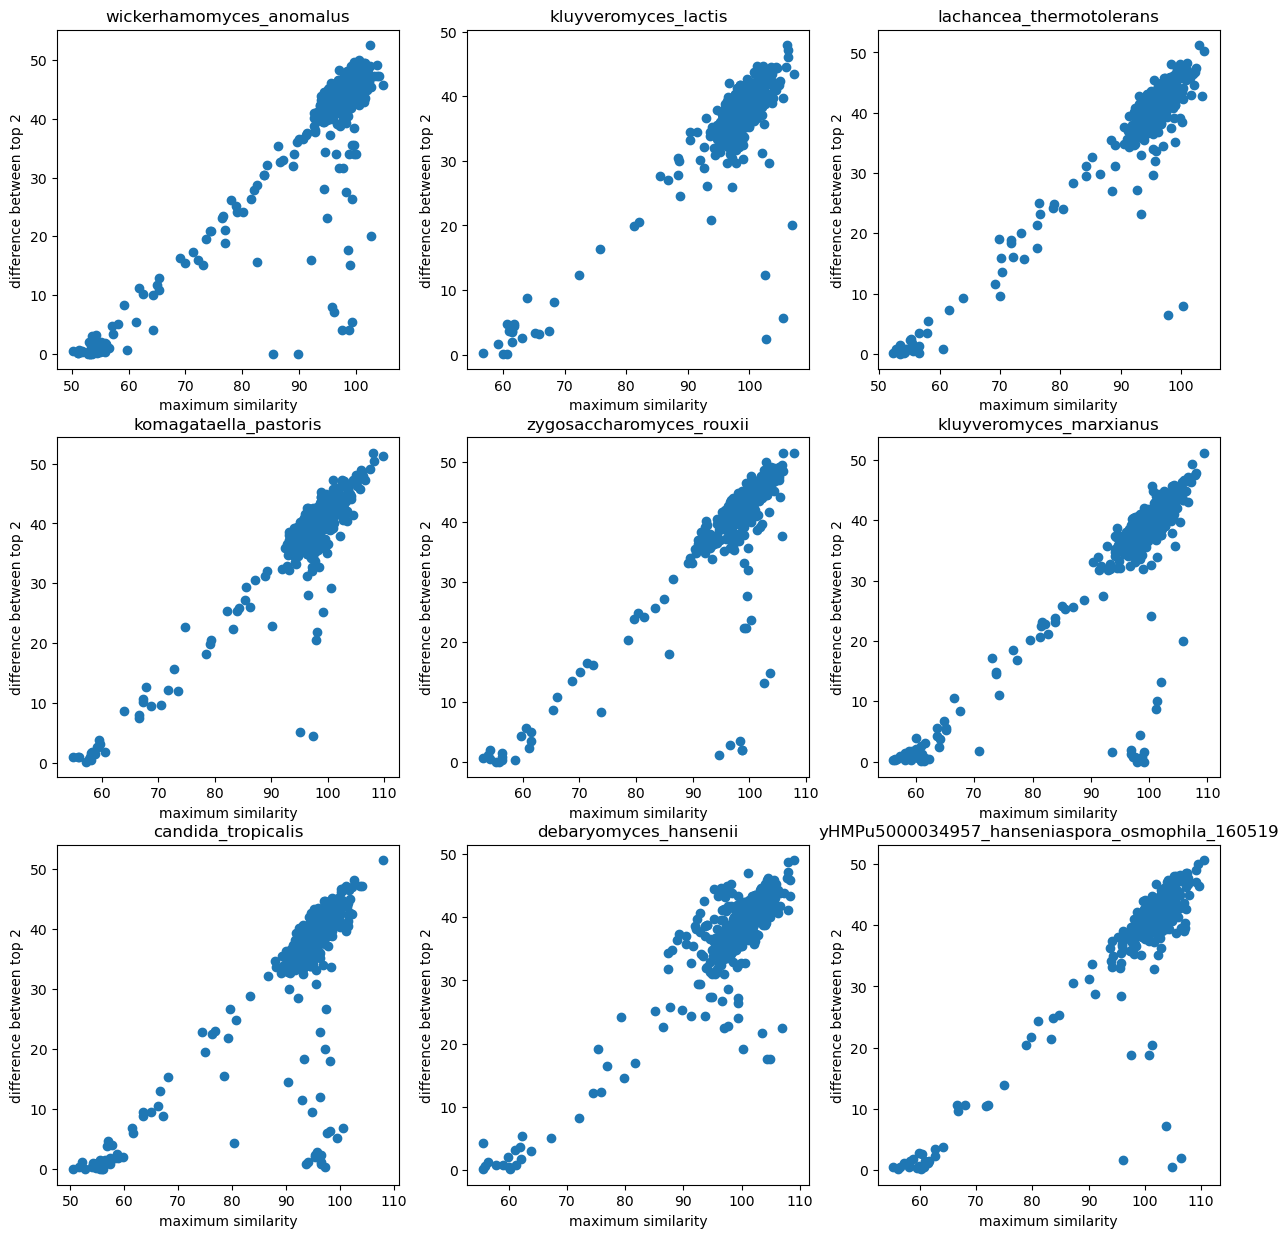

In [ ]:
## Show histogram of the pairwise scores and use it to choose thresholds: 

fig, axarr = plt.subplots(3,3, figsize=(15,15))

#pairwise_scores = {}
#for jj, spec in enumerate(['Ncas','Klac','Smik']):

#pairwise_score_fname = data_processing_dir + os.path.normpath("ortholog_files_YGOB/AA_lists/" + spec + "_pairwise_score.pkl")

#with open(pairwise_score_fname,'rb') as file: 
#    pairwise_score= pickle.load(file)

#pairwise_scores[spec] = pairwise_score
#Use histogram to choose thresholds

for jj, (spec_orig_genome, pairwise_score) in enumerate(pairwise_scores.items()):
    ax = axarr.flatten()[jj]
    maxvals = []
    diff_top2 = []
    for genename_shen, options in pairwise_score.items(): 
        options_sorted = options.sort_values()
        #idxmax = options.idxmax()
        maxval = options_sorted[-1]
        diff_top2_val = maxval-options_sorted[-2]
        diff_top2.append(diff_top2_val)
        maxvals.append(maxval)
        #if maxval<90: 
        #if (maxval>90) & (diff_top2_val<20):
        #   print('{}, maxval: {}, difference: {}'.format(genename_shen,maxval,diff_top2_val))

    
    ax.scatter(maxvals, diff_top2)
    ax.set_title(spec_orig_genome)
    ax.set_xlabel('maximum similarity')
    ax.set_ylabel('difference between top 2')
    #ax.set_title(spec)

In [ ]:
#Save mapping files for each species in the diverse yeast proteomics dataset. 
#Also saves log file for numbers of ids found and lists multimappers. 


#pairwise_scores originally calculated in 20211025_alphafold_selection.ipynb
pairwise_scores_fname = base_dir  + os.sep + 'pairwise_scores.pkl'
# Load pairwise_scores
with open(pairwise_scores_fname, 'rb') as f: 
    pairwise_scores = pickle.load(f)

    
#Load proteomics Dataset
combined_data = pd.read_csv(proteomics_dir + os.sep + os.path.normpath('220811/220811_Diverse_species_SF08_6h_CN1_woSlowGrowth.csv'), index_col=0)



#D. hansenii and H. osmophilia  missing from 220811_Diverse_species_SF08_6h_CN1_woSlowGrowth.csv?
spec_abbrev_map = {'BY': 'saccharomyces_cerevisiae', 
                   'SC': 'saccharomyces_cerevisiae', 
                   'CA': 'candida_albicans', 
                   'CT': 'candida_tropicalis', 
                   'KL': 'kluyveromyces_lactis', 
                   'KM': 'kluyveromyces_marxianus', 
                   'LT': 'lachancea_thermotolerans',
                   'PP': 'komagataella_pastoris', 
                   'WA': 'wickerhamomyces_anomalus', 
                   'ZR': 'zygosaccharomyces_rouxii'
                  }

#(species genome name: (shen_fname, uniprot_fname)): 
proteome_fasta_dict = {'kluyveromyces_lactis': {'shen': shen_proteome_dir + 'kluyveromyces_lactis.max.pep', 
                                                'uniprot': uniprot_proteome_dir + 'Klac_uniprot-proteome_UP000000598.fasta'
                                               }, 
                       'wickerhamomyces_anomalus': {'shen': shen_proteome_dir + 'wickerhamomyces_anomalus.max.pep',
                            'uniprot': uniprot_proteome_dir + 'Wano_uniprot-proteome_UP000094112.fasta'
                           }, 
                       'lachancea_thermotolerans': {'shen': shen_proteome_dir + 'lachancea_thermotolerans.max.pep',
                            'uniprot': uniprot_proteome_dir + 'Lthe_uniprot-proteome_UP000002036.fasta'
                           }, 
                       'komagataella_pastoris': {'shen': shen_proteome_dir + 'komagataella_pastoris.max.pep',
                            'uniprot': uniprot_proteome_dir + 'Kpas_uniprot-proteome_UP000000314.fasta'
                           }, 
                        'candida_tropicalis': {'shen': shen_proteome_dir + 'candida_tropicalis.max.pep',
                            'uniprot': uniprot_proteome_dir + 'Ctro_uniprot-proteome_UP000002037.fasta'
                           },
                        'debaryomyces_hansenii': {'shen': shen_proteome_dir + 'debaryomyces_hansenii.max.pep',
                            'uniprot': uniprot_proteome_dir + 'Dhan_uniprot-proteome_UP000000599.fasta'
                           }, 
                        'yHMPu5000034957_hanseniaspora_osmophila_160519': {'shen': shen_proteome_dir + 'yHMPu5000034957_hanseniaspora_osmophila_160519.max.pep',
                            'uniprot': uniprot_proteome_dir + 'Hosm_uniprot-proteome_UP000095728.fasta'
                           }, 
                        'kluyveromyces_marxianus': {'shen': shen_proteome_dir + 'kluyveromyces_marxianus.max.pep',
                            'uniprot': uniprot_proteome_dir + 'Kmar_uniprot-proteome_UP000065495.fasta'
                           }, 
                        'zygosaccharomyces_rouxii': {'shen': shen_proteome_dir + 'zygosaccharomyces_rouxii.max.pep',
                            'uniprot': uniprot_proteome_dir + 'Zrou_uniprot-proteome_UP000008536.fasta'
                           }, 
                        'saccharomyces_cerevisiae': {'uniprot': uniprot_proteome_dir + 'Scer_uniprot-proteome_UP000002311.fasta'}
                      }


fname_log = proteomics_dir + os.sep + os.path.normpath('220811/uniprot_2_y1000id_log.txt')


with open(fname_log,'w') as f_log: 
    for spec_abbrev, spec in spec_abbrev_map.items():
        #Skipping S. cer because I don't have pairwise scores for that
        if not(spec_abbrev in {'SC', 'BY', 'CA'}): 
               #spec_abbrev = 'KL' 
            #spec = spec_abbrev_map[spec_abbrev]
            fname_out = proteomics_dir + os.sep + os.path.normpath('220811/uniprot_2_y1000id_' + spec_abbrev + '.csv')


            #Load map from full name to shen identifier 

            spec_lookup_fname = y1000plus_dir + os.sep +  os.path.normpath('y1000plus_tools_data/y1000plus/id_lookups/' + spec + '.csv')
            spec_lookup = pd.read_csv(spec_lookup_fname, index_col=0)

            shen_full_2_y1000_id = dict(zip(spec_lookup['gene_full'], spec_lookup['y1000_id']))

            #Make Dictionary from pairwise scores
            pairwise_scores_spec = pairwise_scores[spec]

            sim_score_high_thresh = 75
            sim_score_low_thresh = 60
            sim_score_diff_thresh = 8

            shen_full_2_uniprot = {}

            f_log.write('Species: ' + spec + '\n')

            for shen_full, scores in pairwise_scores_spec.items(): 

                #shen_full = 'augustus_masked-CR382121-processed-gene-0.43'
                #scores = pairwise_scores_spec[shen_full]

                scores_sorted = scores.sort_values(ascending=False)
                maxval = scores_sorted[0]
                diff_top2_val = maxval - scores_sorted[1]

                if ((maxval>sim_score_high_thresh) | ((maxval>sim_score_low_thresh) & (diff_top2_val>sim_score_diff_thresh))): 
                    uniprot_id = scores_sorted.index[0].split('|')[1]  #The id looks like tr|<ID>|<name_specabbrev>, so we only extract the middle id

                else: 
                    f_log.write('No clear uniprot match: ' + shen_full)
                    uniprot_id = None

                shen_full_2_uniprot[shen_full] = uniprot_id



            f_log.write('Shen IDs in selected OGs: ' + str(len(pairwise_scores_spec)) + '\n')
            shen_mapped = [value for value in shen_full_2_uniprot.values() if value != None]
            f_log.write('Shen IDs mapped to uniprot: ' + str(len(shen_mapped)))
            if len(shen_mapped)==len(set(shen_mapped)):
                f_log.write('One shen ID mapped to multiple Uniprot IDs\n')
                f_log.write('Duplicate Uniprot IDs: \n')
                for name, count in Counter(shen_mapped).items(): 
                    if count>1: 
                        f_log.write(name + '\n')

            #check how many shen_ids are missing
            f_log.write('total Shen IDs: ' + str(len(spec_lookup))+ '\n')
            assert len(set(shen_full_2_uniprot.keys()) - set(spec_lookup['gene_full']))==0, 'Some unidentifed shen ids'
            f_log.write('Shen IDs not mapped from og score matrix: ' + str(len(set(spec_lookup['gene_full']) - set(shen_full_2_uniprot.keys())))+ '\n')

            #Check how many uniprot ids are missing
            uniprot_ids = []
            uniprot_fasta = SeqIO.parse(proteome_fasta_dict[spec]['uniprot'], "fasta")
            for seq in uniprot_fasta: 
                name = seq.name
                uniprot_ids.append(name.split('|')[1])

            f_log.write('Total Uniprot IDs: ' +  str(len(uniprot_ids))+ '\n')
            assert len(set(shen_full_2_uniprot.values()) - (set(uniprot_ids) | {None}))==0, 'Some unidentifed Uniprot IDs'
            f_log.write('Uniprot IDs not mapped from og score matrix: ' + str(len(set(uniprot_ids) - set(shen_full_2_uniprot.values())))+ '\n')

            #Check how many uniprot ids are missing from Federica's data (assert none)
            data_uniprot_ids = combined_data.loc[combined_data['Species']==spec_abbrev, :]['Protein.Ids'] 
            f_log.write('Uniprot IDs in data: ' + str(len(set(data_uniprot_ids)))+ '\n')

            #Check how many from federica's data set map to shen ids
            f_log.write('Uniprot IDs in data that map to OG proteins: ' + str(len(set(data_uniprot_ids) & set(shen_full_2_uniprot.values())  ))+ '\n')





            #Make dictionary of Uniprot id to shen identifer 

            uniprot_id_2_y1000_id_spec = {}

            with open(fname_out, 'w') as f_out: 
                for key, value in shen_full_2_uniprot.items(): 
                    if value != None: 
                        uniprot_id_2_y1000_id_spec[value] = shen_full_2_y1000_id[key]
                        f_out.write(value + ', ' + shen_full_2_y1000_id[key] +'\n')

# Map from shen et al IDs to Uniprot Ids for species not contained in proteomics dataset. 

In [ ]:
#Extract gene_full name from selected_proteins.fasta file for the species in question. 
#Added giotrichum_candidum because it was left out of the original mapping (and didn't have proteomics data either)

specs_uniprot_no_proteomics = species_selection[((species_selection['Experimental_data']=='N') & (species_selection['Load']=='Y')) & (~(species_selection['Uniprot Proteome'].isna())) | (species_selection['original_genome_id']=='geotrichum_candidum')]

selected_proteins_fname = base_dir + os.sep +  os.path.normpath('selected_proteins/selected_proteins.fasta')

gene_full_sets = {}

for ind,row in specs_uniprot_no_proteomics.iterrows():
    spec = row['original_genome_id']

    #if spec=='geotrichum_candidum': # Added 'geotrichum_candidum' later after realizing it was left out the first time.

    selected_proteins = SeqIO.parse(selected_proteins_fname,'fasta')

    #iterate through selected proteins and build a fasta of selected protiens for that species.
    #Also build a list of the genenames from the shen study that we want to use.  

    #gene_full_set = []

    selected_proteins_fname_species = base_dir + os.sep +  os.path.normpath('selected_proteins/selected_proteins_by_species/' + spec + '__shen__selected_proteins.fasta')

    with open(selected_proteins_fname_species, 'w') as f_out:
        for record in selected_proteins: 
            record_spec = record.id.split('__')[0]
            if record_spec==spec:
                (record_field, gene_full) = record.description.split()[3].split('=')
                assert record_field=='gene_full_shen', 'record header not correct: ' + record.description
                #gene_full_set.append(gene_full)
                f_out.write('>' + record.description + '\n')
                f_out.write(str(record.seq) + '\n')

        #gene_full_check = record.description.split()[1].split('=')[1]



In [ ]:
specs_uniprot_no_proteomics = species_selection[((species_selection['Experimental_data']=='N') & (species_selection['Load']=='Y')) & (~(species_selection['Uniprot Proteome'].isna())) | (species_selection['original_genome_id']=='geotrichum_candidum')]


proteome_fasta_dict = {}
#(orig_genome name: (shen_fname, uniprot_fname))
for ind,row in specs_uniprot_no_proteomics.iterrows():
    spec = row['original_genome_id']
    proteome_fasta_dict[spec] = {'shen':    base_dir + os.sep + os.path.normpath('selected_proteins/selected_proteins_by_species/' + spec + '__shen__selected_proteins.fasta'),    #shen_proteome_dir + spec + '.max.pep', instead of full proteome, use the subset of proteins we have selected
                                 'uniprot': uniprot_proteome_dir + spec + '__uniprotkb_proteome_'+ row['Uniprot Proteome'] + '.fasta'
                                 }



In [20]:
specs_uniprot_no_proteomics

,Species name,Time_tree_name,jacobs_name,original_genome_id,Abbreviation,Abbreviation_2,spec_og_id,Alphafold_structures,Long_read_seqs,Experimental_data,...,Uniprot Proteome,CUG usage,Notes,Sequence source for Alphafold,Genome Sequence for CDS from uniprot,Index for big tree,New_Class,New_Order,new_species,new_time_tree_name
3,Ogataea parapolymorpha,Ogataea_parapolymorpha,Ogataea_parapolymorpha,ogataea_parapolymorpha,Opar,O. parapolymorpha,104.0,new,NaN,N,...,UP000008673,Leu,NaN,shen,NaN,4.0,Picchiomycetes,Pichiales,Ogataea parapolymorpha,Ogataea_parapolymorpha_DL-1
5,Pachysolen tannophilus,Pachysolen_tannophilus,Pachysolen_tannophilus,pachysolen_tannophilus,Ptan,P. tannophilus,106.0,new,NaN,N,...,UP000094236,Ala,NaN,shen,NaN,6.0,Picchiomycetes,Alaninales,Pachysolen tannophilus,Pachysolen_tannophilus
6,Kazachstania naganishii,Kazachstania_naganishii,Kazachstania_naganishii,kazachstania_naganishii,Knag,K. naganishii,49.0,new,NaN,N,...,UP000006310,Leu,Post WGH,shen,NCBI,7.0,Saccharomycetes,Saccharomycetales,Kazachstania naganishii,Kazachstania_naganishii
8,Vanderwaltozyma polyspora,Vanderwaltozyma_polyspora,Vanderwaltozyma_polyspora,vanderwaltozyma_polyspora,Vpol,V. polyspora,136.0,new,NaN,N,...,UP000000267,Leu,Post WGH,shen,NaN,9.0,Saccharomycetes,Saccharomycetales,Vanderwaltozyma polyspora,Vanderwaltozyma_polyspora
9,Torulaspora delbrueckii,Torulaspora_delbrueckii,Torulaspora_delbrueckii,torulaspora_delbrueckii,Tdel,T. delbrueckii,135.0,new,NaN,N,...,UP000005627,Leu,ZT,shen,NaN,10.0,Saccharomycetes,Saccharomycetales,Torulaspora delbrueckii,Torulaspora_delbrueckii
12,Eremothecium gossypii,Eremothecium_gossypii,Eremothecium_gossypii,eremothecium_gossypii,Egos,E. gossypii,40.0,new,NaN,N,...,UP000000591,Leu,KLE,shen,NaN,13.0,Saccharomycetes,Saccharomycetales,Eremothecium gossypii,Eremothecium_gossypii
16,Cyberlindnera jadinii,Cyberlindnera_jadinii,Cyberlindnera_jadinii,cyberlindnera_jadinii,Cjad,C. jadinii,35.0,new,NaN,N,...,UP000094389,Leu,NaN,shen,NaN,17.0,Saccharomycetes,Phaffomycetales,Cyberlindnera jadinii,Cyberlindnera_jadinii
18,Ascoidea rubescens,Ascoidea_rubescens,Ascoidea_rubescens,ascoidea_rubescens,Arub,A. rubescens,6.0,new,NaN,N,...,UP000095038,Ser,NaN,shen,NaN,19.0,Saccharomycetes,Ascoideales,Ascoidea rubescens,Ascoidea_rubescens
22,Geotrichum candidum,Geotrichum_candidum,Geotrichum_candidum,geotrichum_candidum,Gcan,G. candidum,43.0,new,Y,Y,...,UP000242525,Leu,NaN,shen,NaN,23.0,Dipodascomycetes,Dipodascales,Geotrichum candidum,Geotrichum_candidum_CLIB_918
23,Yarrowia lipolytica,Yarrowia_lipolytica,Yarrowia_lipolytica,yarrowia_lipolytica,Ylip,Y. lipolytica,144.0,new,NaN,N,...,UP000001300,Leu,NaN,shen,NaN,24.0,Dipodascomycetes,Dipodascales,Yarrowia lipolytica,Yarrowia_lipolytica_CLIB_122


In [10]:
#Find matches comparing study1 (shen) and study2 (uniprot) proteome. 

#Only need to redo this if you are re-calculating pairwise_scores

study1 = 'shen'
study2 = 'uniprot'

match_points = 1
mismatch_points = -1
gap_open = -.5
gap_extension = -0.1
NN_top_scores = 5
penalize_end_gaps = True 


pairwise_scores = {}
spec_orig_genomes = ['geotrichum_candidum']  #list(set(specs_uniprot_no_proteomics['original_genome_id'])-{'ogataea_parapolymorpha'})  

#['ogataea_parapolymorpha']#list[proteome_fasta_dict.keys()]#[ 'yHMPu5000034957_hanseniaspora_osmophila_160519']  #'zygosaccharomyces_rouxii','kluyveromyces_marxianus','candida_tropicalis', 'debaryomyces_hansenii',

for spec_orig_genome in spec_orig_genomes:
    print(spec_orig_genome)
    #spec_orig_genome = 'komagataella_pastoris'# 'lachancea_thermotolerans' #'wickerhamomyces_anomalus' # 'kluyveromyces_lactis'

    # use_subset = True
    
    # # Make a dictionary of gene_full_shen:sequence for the given species
    # with open(proteome_fasta_dict[spec_orig_genome][study1],'fasta'):
    #     for seq_study1 in 


    
    # subset = set(gene_full_sets[spec_orig_genome])
    # pairwise_score_loaded = False #if you have already saved some and want to do the rest

    # # #Check timing with time module
    # # #python parallel programming library
    # # #ipy_parallel dask
    # # #https://ipyparallel.readthedocs.io/en/stable/development/messages.html#parallel-messages

    # # #All by all pairwise sequence alignment, output top NN results

    # genenames_study1 = []
    # AA_seqs_study1 = SeqIO.parse(proteome_fasta_dict[spec_orig_genome][study1], "fasta")
    # for seq_study1 in AA_seqs_study1: 
    #     genename_study1 = record.description.split()[3].split('=')[1]   #dyt.gene_id_retrieve(study1, seq_study1)
    # #     if spec=='Smik': 
    # #         genename_study1_dash = genename_study1
    # #         genename_study1 = 'smik' + genename_study1_dash.split('smik_')[1]
    #     genenames_study1.append(genename_study1)

    # if use_subset: 
    #     print('Using Subset genes')
    # else: 
    #     subset = set(genenames_study1)

    # if pairwise_score_loaded: 
    #     genes_to_search = ((subset & set(genenames_study1)) - set(pairwise_score.keys()))
    # else: 
    #     pairwise_score = {}
    #     genes_to_search = (subset & set(genenames_study1))

    pairwise_score = {}

    AA_seqs_study1 = SeqIO.parse(proteome_fasta_dict[spec_orig_genome][study1], "fasta")

    #N = len(genes_to_search)
    N=0
    for seq_study1 in AA_seqs_study1: 
        #check_gene = False
        genename_study1 = seq_study1.description.split()[3].split('=')[1]   #dyt.gene_id_retrieve(study1, seq_study1)
    #     if spec=='Smik': 
    #         genename_study1_dash = genename_study1
    #         genename_study1 = 'smik' + genename_study1_dash.split('smik_')[1]
        # if genename_study1 in genes_to_search:
        #     check_gene = True

        #if check_gene: 
        print(str(N) + ' ' + genename_study1)
        AA_seqs_study2 = SeqIO.parse(proteome_fasta_dict[spec_orig_genome][study2], "fasta")
        pairwise_score_comps = {}
        for seq_study2 in AA_seqs_study2: 
            genename_study2 = seq_study2.id
            score = pairwise2.align.globalms(seq_study2,seq_study1, match_points, mismatch_points, gap_open, gap_extension, penalize_end_gaps = penalize_end_gaps, score_only = True )
            pairwise_score_comps[genename_study2] = score
        pairwise_score_comps_df = pd.Series(pairwise_score_comps)
        pairwise_score[genename_study1] = pairwise_score_comps_df.sort_values(ascending=False).iloc[0:NN_top_scores]
        #print(pairwise_score[genename_YGOB])
        N = N + 1

    pairwise_score_fname = base_dir + os.sep + os.path.normpath('selected_proteins/shen_uniprot_mapping/pairwise_score__'+spec_orig_genome+ '.pkl')

    # Save pairwise_score
    with open(pairwise_score_fname, 'wb') as f:
        pickle.dump(pairwise_score, f)
        #pairwise_scores[spec_orig_genome] =  pairwise_score

geotrichum_candidum
0 genemark-CCBN010000001.1-processed-gene-0.12
1 genemark-CCBN010000001.1-processed-gene-2.8
2 genemark-CCBN010000001.1-processed-gene-2.12
3 genemark-CCBN010000001.1-processed-gene-2.32
4 genemark-CCBN010000001.1-processed-gene-2.20
5 genemark-CCBN010000001.1-processed-gene-3.39
6 genemark-CCBN010000001.1-processed-gene-3.44
7 genemark-CCBN010000001.1-processed-gene-3.59
8 genemark-CCBN010000001.1-processed-gene-5.46
9 genemark-CCBN010000001.1-processed-gene-5.48
10 genemark-CCBN010000001.1-processed-gene-5.49
11 genemark-CCBN010000001.1-processed-gene-5.54
12 genemark-CCBN010000001.1-processed-gene-5.76
13 maker-CCBN010000001.1-snap-gene-6.31
14 genemark-CCBN010000001.1-processed-gene-6.59
15 augustus_masked-CCBN010000001.1-processed-gene-6.13
16 genemark-CCBN010000001.1-processed-gene-7.5
17 genemark-CCBN010000001.1-processed-gene-7.18
18 genemark-CCBN010000001.1-processed-gene-7.25
19 genemark-CCBN010000001.1-processed-gene-7.15
20 genemark-CCBN010000001.1-proce

In [ ]:
##Load pairwise score (extra species)
specs_uniprot_no_proteomics = species_selection[((species_selection['Experimental_data']=='N') & (species_selection['Load']=='Y')) & (~(species_selection['Uniprot Proteome'].isna())) | (species_selection['original_genome_id']=='geotrichum_candidum')]

pairwise_scores = {}

for spec_orig_genome in specs_uniprot_no_proteomics['original_genome_id']:   
    #spec_orig_genome = 'ogataea_parapolymorpha'
    pairwise_score_fname = base_dir + os.sep + os.path.normpath('selected_proteins/shen_uniprot_mapping/pairwise_score__'+spec_orig_genome+ '.pkl')
    #pairwise_scores_fname = base_dir + os.sep + 'pairwise_scores.pkl'

    # # Save pairwise_scores
    # with open(pairwise_scores_fname, 'wb') as f:
    #     pickle.dump(pairwise_scores, f)

    # Load pairwise_scores
    with open(pairwise_score_fname, 'rb') as f: 
        pairwise_score = pickle.load(f)
    
    pairwise_scores[spec_orig_genome]=pairwise_score

C:\Users\bheineike\AppData\Local\Temp\ipykernel_51896\1307823161.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  maxval = options_sorted[-1]
C:\Users\bheineike\AppData\Local\Temp\ipykernel_51896\1307823161.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff_top2_val = maxval-options_sorted[-2]


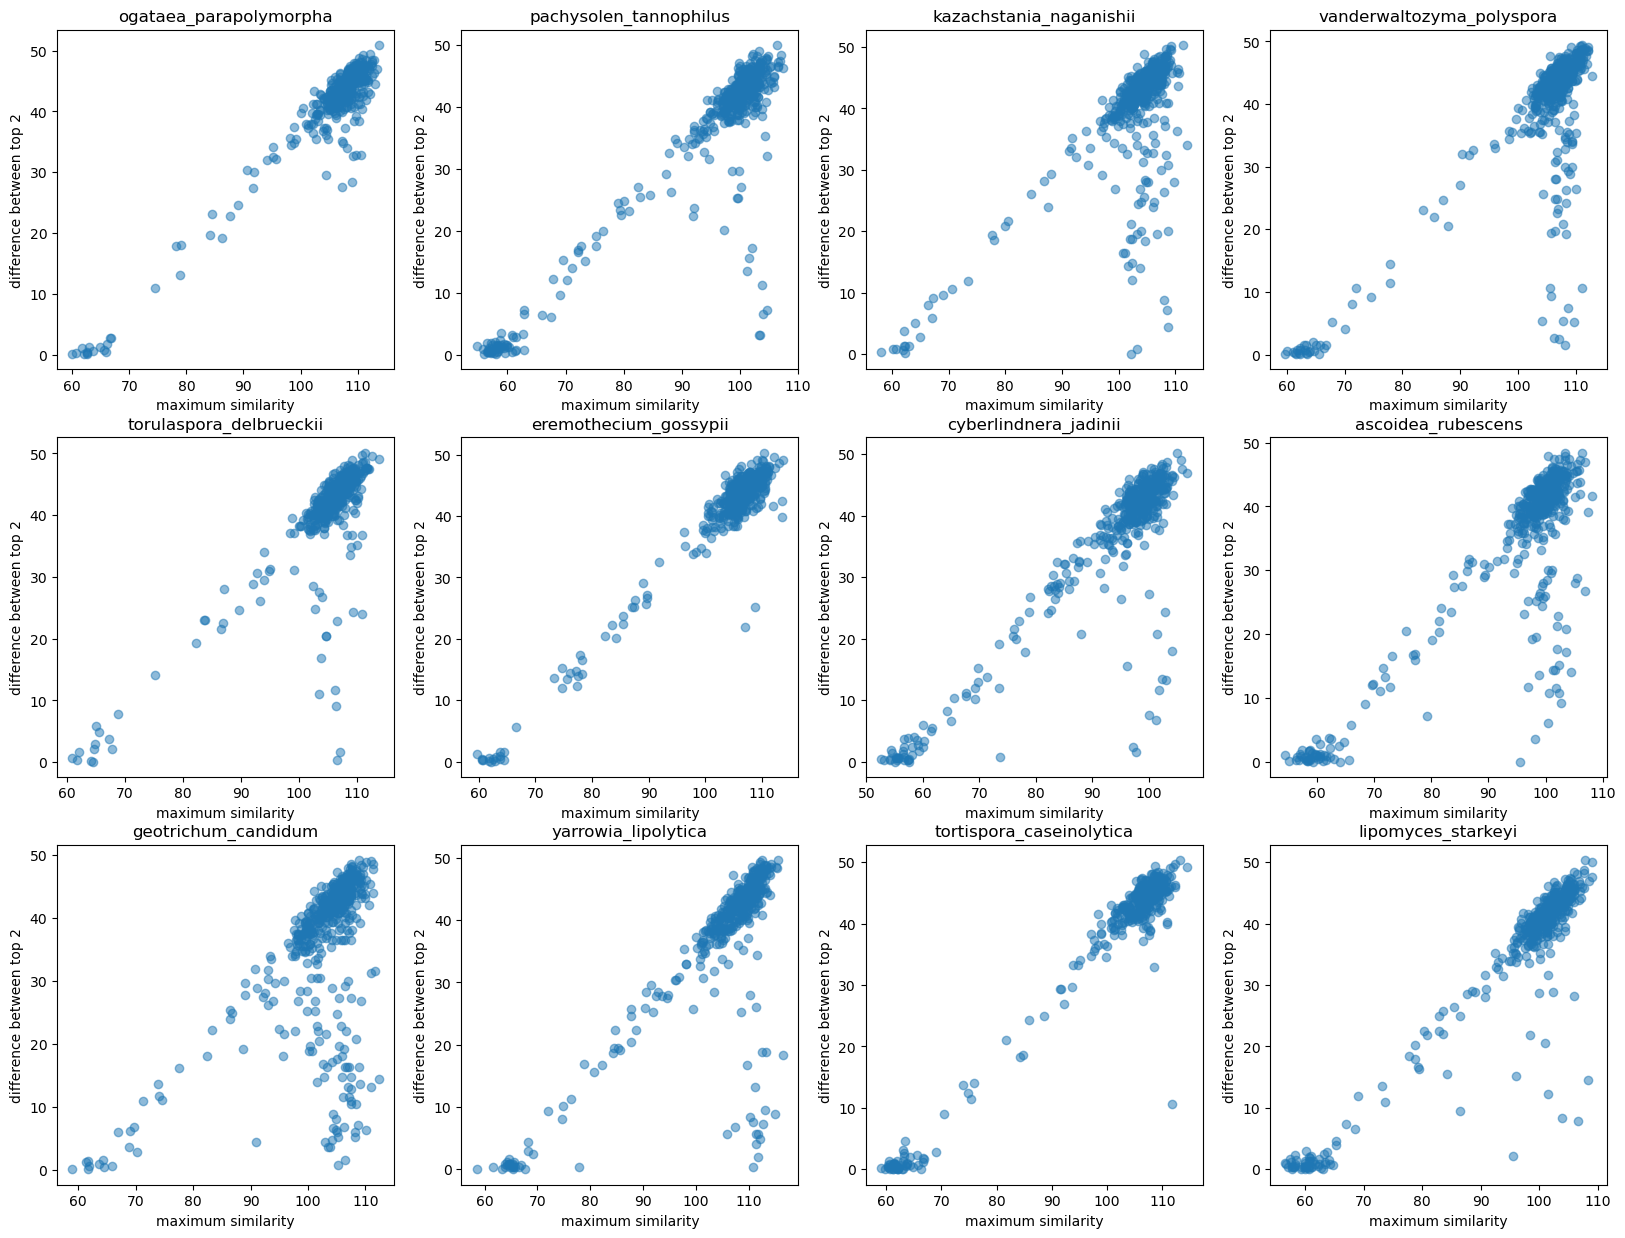

In [17]:
## Show histogram of the pairwise scores and use it to choose thresholds: 

fig, axarr = plt.subplots(3,4, figsize=(20,15))
#fig, ax = plt.subplots(1,1)

for jj, (spec_orig_genome, pairwise_score) in enumerate(pairwise_scores.items()):

#spec_orig_genome = 'ogataea_parapolymorpha'
    ax = axarr.flatten()[jj]
    maxvals = []
    diff_top2 = []
    for genename_shen, options in pairwise_score.items(): 
        options_sorted = options.sort_values()
        #idxmax = options.idxmax()
        maxval = options_sorted[-1]
        diff_top2_val = maxval-options_sorted[-2]
        diff_top2.append(diff_top2_val)
        maxvals.append(maxval)
        #if maxval<90: 
        #if (maxval>90) & (diff_top2_val<20):
        #   print('{}, maxval: {}, difference: {}'.format(genename_shen,maxval,diff_top2_val))


    ax.scatter(maxvals, diff_top2, alpha = 0.5)
    ax.set_title(spec_orig_genome)
    ax.set_xlabel('maximum similarity')
    ax.set_ylabel('difference between top 2')

In [ ]:
sim_score_high_thresh = 75
sim_score_low_thresh = 60
sim_score_diff_thresh = 8


for spec_orig_genome, pairwise_score in pairwise_scores.items():
    if spec_orig_genome=='geotrichum_candidum':
        #spec_orig_genome = 'ogataea_parapolymorpha'


        #Read in shen protein IDs using fasta file header
        selected_proteins_fname_species = base_dir + os.sep +  os.path.normpath('selected_proteins/selected_proteins_by_species/' + spec_orig_genome + '__shen__selected_proteins.fasta')

        #Load map from full name to shen identifier 
        spec_lookup_fname = y1000plus_dir + os.sep +  os.path.normpath('y1000plus_tools_data/y1000plus/id_lookups/' + spec_orig_genome + '.csv')
        spec_lookup = pd.read_csv(spec_lookup_fname, index_col=0)

        selected_proteins_shen = SeqIO.parse(selected_proteins_fname_species, "fasta")

        # pairwise_score_fname = base_dir + os.sep + os.path.normpath('selected_proteins/shen_uniprot_mapping/pairwise_score__'+spec_orig_genome+ '.pkl')
        # # Load pairwise_score
        # with open(pairwise_score_fname, 'rb') as f: 
        #     pairwise_score = pickle.load(f)


        #Output is a csv with y1000 gene_id, gene_full, y1000_id, and uniprot_id if present. 
        fname_out = base_dir + os.sep + os.path.normpath('/selected_proteins/shen_uniprot_mapping/y1000_id_2_uniprot_id_' + spec_orig_genome + '.csv')

        with open(fname_out, 'w') as f_out: 
            for record_shen in selected_proteins_shen: 
                #check_gene = False
                gene_full = record_shen.description.split()[3].split('=')[1] 

                spec_lookup_row = spec_lookup[spec_lookup['gene_full']==gene_full]
                assert len(spec_lookup_row) == 1, 'No single match for ' + gene_full
                gene_id = spec_lookup_row.index[0]
                y1000_id = spec_lookup_row['y1000_id'][gene_id]

                scores = pairwise_score[gene_full]
                scores_sorted = scores.sort_values(ascending=False)
                maxval = scores_sorted[0]
                diff_top2_val = maxval - scores_sorted[1]

                if ((maxval>sim_score_high_thresh) | ((maxval>sim_score_low_thresh) & (diff_top2_val>sim_score_diff_thresh))): 
                    uniprot_id = scores_sorted.index[0].split('|')[1]  #The id looks like tr|<ID>|<name_specabbrev>, so we only extract the middle id

                else: 
                    #f_log.write('No clear uniprot match: ' + shen_full)
                    uniprot_id = None

                f_out.write('{},{},{},{}\n'.format(gene_id,gene_full,y1000_id, uniprot_id))

C:\Users\bheineike\AppData\Local\Temp\ipykernel_51896\3706305531.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  maxval = scores_sorted[0]
C:\Users\bheineike\AppData\Local\Temp\ipykernel_51896\3706305531.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff_top2_val = maxval - scores_sorted[1]


In [ ]:
# Add these uniprot ids to selected_protein_ids.json. 
# This data was originally made in 20221012_assemble_peptide_cds_fastas.ipynb. 

specs_uniprot_no_proteomics = species_selection[((species_selection['Experimental_data']=='N') & (species_selection['Load']=='Y')) & (~(species_selection['Uniprot Proteome'].isna()))]



#Load og_out_data_filt
sel_prot_ids_fname = base_dir + os.sep +  'selected_proteins' + os.sep +  'selected_protein_ids.json'
with open(sel_prot_ids_fname, 'r') as f:
    sel_prot_ids = json.load(f) 

for spec, spec_data in sel_prot_ids.items(): 
    
